Remove warnings:

In [136]:
import warnings
warnings.filterwarnings('ignore')

Import libraries:

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

Read and transform data:

In [138]:
train = pd.read_csv('hw3_train.csv')
test = pd.read_csv('hw3_test_data.csv')

Show correlations:

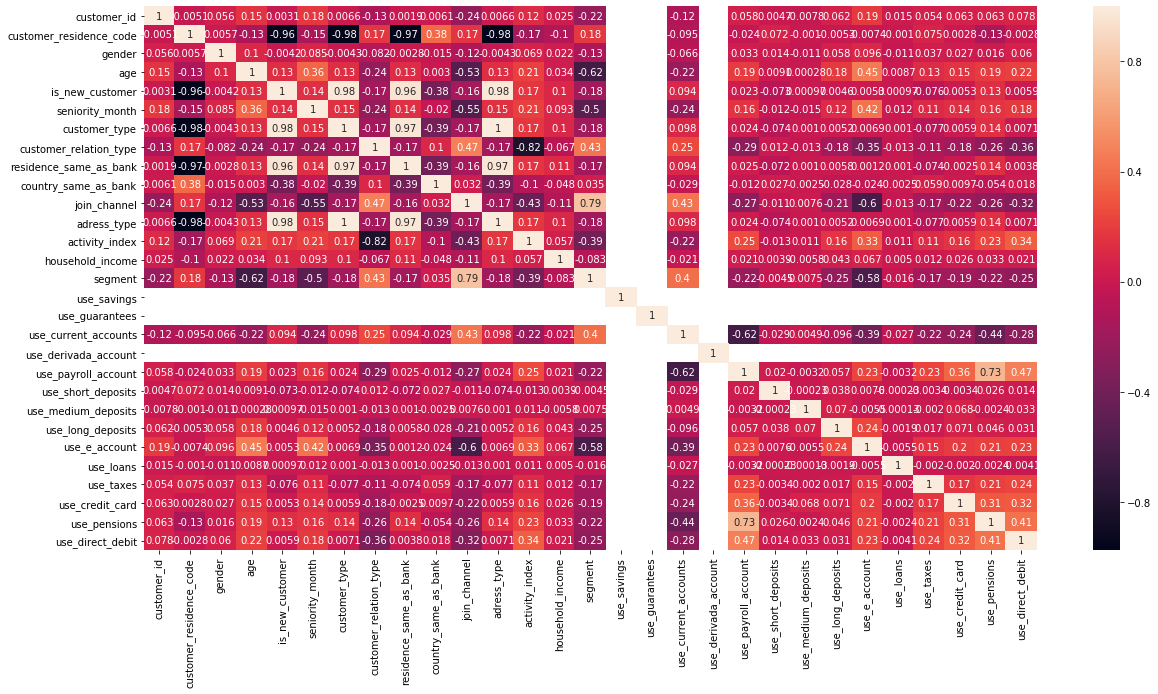

In [139]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr('kendall'), annot=True)
plt.show()

Show distribution of features:

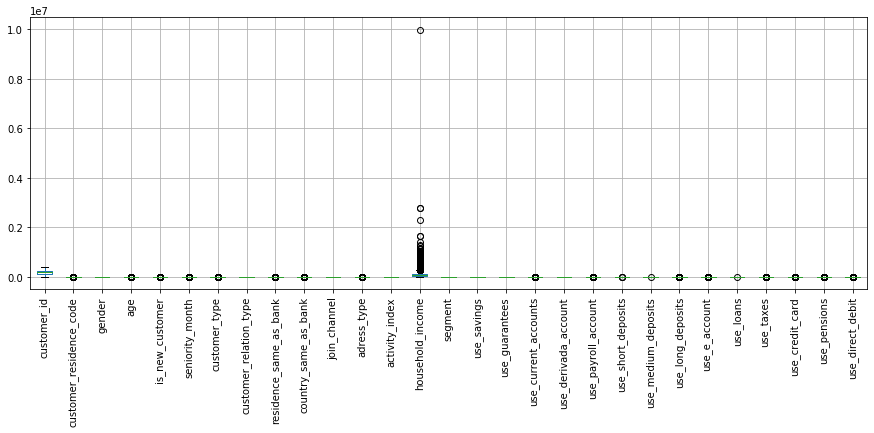

In [140]:
train.plot(kind='box', figsize=(15,5))
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

Show distributions:

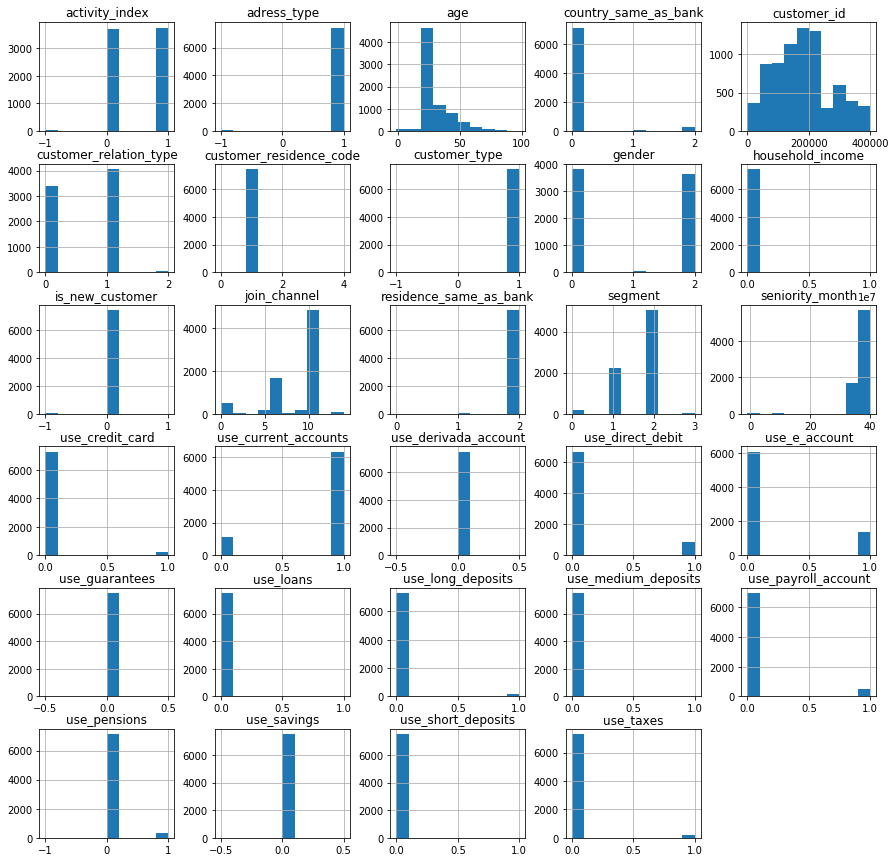

In [101]:
train.hist(figsize=(15, 15))
plt.show()

Transform data:

In [143]:
drop_list = ['use_direct_debit']

x_train = train.drop(drop_list, axis=1)
y_train = train['use_direct_debit']

CV scores:

In [144]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', p=2) 
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='f1')
print('F1: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

F1: 13.328% (3.910%)


Fit the model:

In [145]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', p=2) 
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

Make prediction:

In [146]:
pred = model.predict(test)

Write prediction:

In [147]:
df = pd.DataFrame(zip(test['customer_id'], pred), columns=['customer_id', 'use_direct_debit'])
df.to_csv('pred.csv', sep=',', index=False)